### Imports

In [28]:
##Importing all of our imports needed in this file
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report, roc_auc_score, roc_curve

### User Defined Functions

This section holds all of the functions created which may be used in the program to simplify the code

In [29]:
def show_unique(value):
    print(value.unique())

### Program

The main code section starts from here

In [30]:
##Reading the csv file
df=pd.read_csv('bank-additional-full.csv',sep=";")
pd.options.display.max_columns=10000

In [31]:
##Printing top 10 data from the csv
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Note: We can easily verify the data given in the dataframe above

In [32]:
##Having a look at all the datatypes present in the DataFrame
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [33]:
##Checking the unique values in the Dataframe present
show_unique(df['y'])

['no' 'yes']


In [34]:
##Total Number of Unknown 'string' present in the DataFrame
#len(df.loc[(df['job']=='unknown') | (df['marital']=='unknown') | (df['education']=='unknown') | (df['default']=='unknown') | (df['housing']=='unknown') | (df['loan']=='unknown')])

In [35]:
##Printing all the Data rows having 'Unknown' string present in the DataFrame
#df.loc[(df['job']=='unknown') | (df['marital']=='unknown') | (df['education']=='unknown') | (df['default']=='unknown') | (df['housing']=='unknown') | (df['loan']=='unknown')]

In [36]:
##Printing the Total numberof rows
len(df)

41188

Lets check if there are any Missing values in our Dataset using : isna() or isnull()

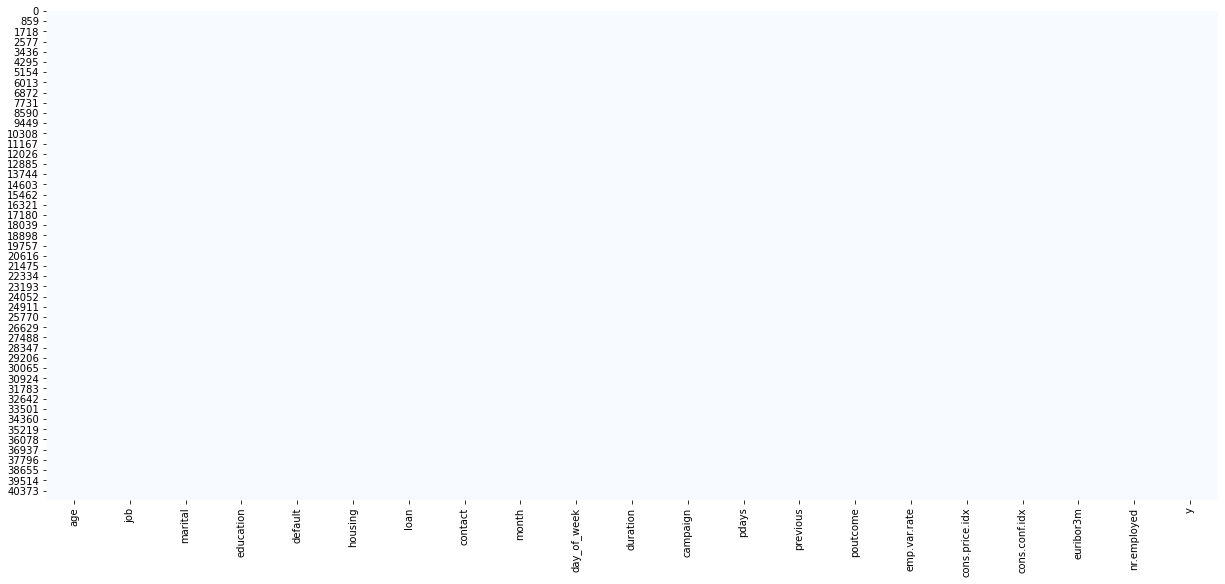

In [37]:
##Setting the figsize as 21,9 for the graph to fit in the screen more efficiently
fig, ax = plt.subplots(figsize=(21,9))
#Plotting the heatmap to check Missing Values
sns.heatmap(df.isna(),cbar=False,cmap="Blues")
plt.show()

In [38]:
##Counting the occurence of each unique values present in our Target Variable 'y'
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

Converting the Target variables data from string('yes','no') to int(1,0), respectively

In [39]:
##Changing 'yes' to 1 and 'no' to 0, because target variable has to be a numerical variable
df.loc[df['y'] == 'yes', 'y'] = 1
df.loc[df['y'] == 'no', 'y'] = 0
##Cast datas of 'y' columns into int64 datatype
df['y']=df['y'].astype('int64')
##Verifying the changes
df['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

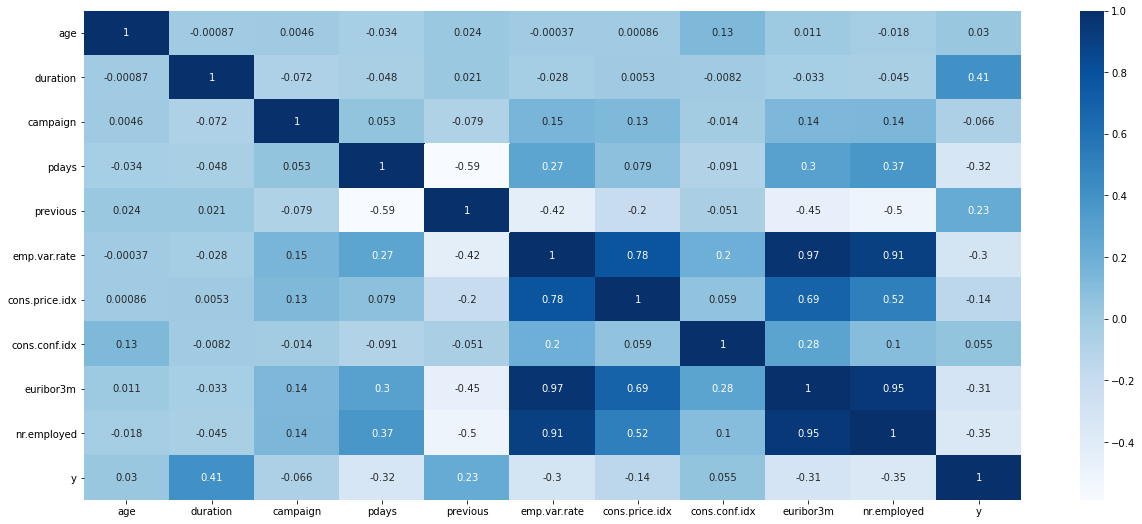

In [40]:
##Creating a Annotted Heatmap using corr() to find correlation between variables present in the DataFrame
##Setting the figsize as 21,9 for the graph to fit in the screen more efficiently
fig, ax = plt.subplots(figsize=(21,9))
##Plotting the heatmap to check correlation
sns.heatmap(df.corr(),cmap="Blues",annot=True)
#plt.show()

In [41]:
#df.plot.kde()

In [42]:
#df.plot.hist()

In [43]:
##Storing all data rows not having 'Unknown' string separately
#df_no_missing=df.loc[(df['job']=='unknown') | (df['marital']=='unknown') | (df['education']=='unknown') | (df['default']=='unknown') | (df['housing']=='unknown') | (df['loan']=='unknown')]

In [44]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                   int64
dtype: object

Separating the Independent and Target Variables into X,y, respectively

In [45]:
#Creating Target and Independent variables
y=df['y']
X=df.drop(['y'], axis=1)

Segment of Try Code

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

In [47]:
y_train.value_counts(normalize=True)

0    0.886914
1    0.113086
Name: y, dtype: float64

In [48]:
y_test.value_counts(normalize=True)

0    0.891236
1    0.108764
Name: y, dtype: float64

In [49]:
X_train.shape, y_train.shape

((37069, 20), (37069,))

In [50]:
X_test.shape, y_test.shape

((4119, 20), (4119,))

Encoding the categorical variables using n-1 Dummy Encoding

In [51]:
X_encoded=pd.get_dummies(X,columns=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome'])

In [52]:
##Splitting the data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.1, random_state=123)

##Create a Decision Tree and fit it into training data
#clf_df = DecisionTreeClassifier(random_state=123)
#clf_df = clf_df.fit(X_train, y_train)

Failed Attempt ! Work on the wrong code and come up with the correct syntax

In [54]:
# logreg.fit(X_train, y_train)
# proba = logreg.predict_proba(X_test)

In [55]:
model = sm.Logit(y_train,X_train).fit()

         Current function value: 0.208488
         Iterations: 35


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


In [56]:
model.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:1354: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                37069
Model:                          Logit   Df Residuals:                    37016
Method:                           MLE   Df Model:                           52
Date:                Sat, 27 Mar 2021   Pseudo R-squ.:                  0.4092
Time:                        13:29:18   Log-Likelihood:                -7728.4
converged:                      False   LL-Null:                       -13082.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
age                               0.0005      0.003      0.191      0.848      -0.005       0.006
duration                          0.0046   7.77e-05     59.727      0.000       0.004       0.005
campaign                         -0.0391      0.012     -3.230      0.001      -0.063      -0.015
pdays                            -0.0009      0.000     -4.055      0.000      -0.001      -0.000
previous                         -0.0529      0.062     -0.857      0.391      -0.174       0.068
emp.var.rate                     -1.8310      0.148    -12.330      0.000      -2.122      -1.540
cons.price.idx                    2.3467      0.263      8.917      0.000       1.831       2.862
cons.conf.idx                     0.0234      0.008      2.866      0.004       0.007       0.039
euribor3m                         0.2837      0.136      2.087      0.037       0.017       0.550
nr.employed                       0.0073      0.003      2.255      0.024       0.001       0.014
job_admin.                       -8.6381   4.79e+05   -1.8e-05      1.000    -9.4e+05     9.4e+05
job_blue-collar                  -8.9190   4.79e+05  -1.86e-05      1.000   -9.39e+05    9.39e+05
job_entrepreneur                 -8.8255   4.79e+05  -1.84e-05      1.000   -9.39e+05    9.39e+05
job_housemaid                    -8.6887   4.82e+05   -1.8e-05      1.000   -9.44e+05    9.44e+05
job_management                   -8.7224   4.82e+05  -1.81e-05      1.000   -9.44e+05    9.44e+05
job_retired                      -8.3627    4.8e+05  -1.74e-05      1.000   -9.41e+05    9.41e+05
job_self-employed                -8.7732   4.79e+05  -1.83e-05      1.000   -9.38e+05    9.38e+05
job_services                     -8.7983   4.78e+05  -1.84e-05      1.000   -9.36e+05    9.36e+05
job_student                      -8.4210   4.81e+05  -1.75e-05      1.000   -9.43e+05    9.43e+05
job_technician                   -8.6364   4.78e+05  -1.81e-05      1.000   -9.37e+05    9.37e+05
job_unemployed                   -8.6364    4.8e+05   -1.8e-05      1.000    -9.4e+05     9.4e+05
job_unknown                      -8.6596    4.8e+05   -1.8e-05      1.000   -9.42e+05    9.42e+05
marital_divorced                -26.1115        nan        nan        nan         nan         nan
marital_married                 -26.0887        nan        nan        nan         nan         nan
marital_single                  -26.0021        nan        nan        nan         nan         nan
marital_unknown                 -26.0246        nan        nan        nan         nan         nan
education_basic.4y              -13.2624        nan        nan        nan         nan         nan
education_basic.6y              -13.0285        nan        nan        nan         nan         nan
education_basic.9y              -13.2371        nan        nan        nan         nan         nan
education_high.school           -13.1976        nan        nan        nan         nan         nan
educati

In [251]:
train_predict = model.predict(X_train)
test_predict=y_pred = model.predict(X_test)

In [252]:
train_predict = [0 if x <.5 else 1 for x in train_predict]
test_predict = [0 if x <.5 else 1 for x in test_predict]

In [253]:
cm1 = confusion_matrix(train_predict,y_train)
print(cm1.ravel())

[31989  2412   888  1780]


In [254]:
cm2 = confusion_matrix(test_predict,y_test)
print(cm2.ravel())

[3581  266   90  182]


In [255]:
new_df=pd.DataFrame(data = cm1, columns= ['Predicted : 0','Predicted : 1'], index =['Actual : 0','Actual : 1'] )

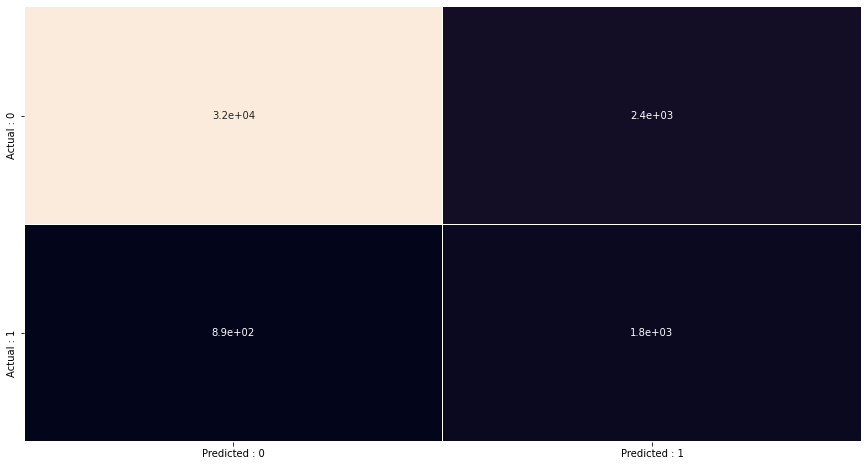

In [256]:
sns.heatmap(new_df,annot= True,linewidths =0.1,cbar=False)

In [257]:
TN,FP,FN,TP= cm1.ravel()

In [258]:
sensitivity = TP / (TP+FN)
print(sensitivity)

0.6671664167916042


In [259]:
specificity = TN /(TN + FP)
print(specificity)

0.9298857591349089


In [260]:
precision = TP / (TP+FP)
print(precision)

0.42461832061068705


In [261]:
F1_score = (2 * precision * sensitivity)/(precision+sensitivity)
print(F1_score)

0.5189504373177842


In [262]:
train_classification=classification_report(train_predict,y_train)


In [263]:
print(train_classification)

              precision    recall  f1-score   support

           0       0.97      0.93      0.95     34401
           1       0.42      0.67      0.52      2668

    accuracy                           0.91     37069
   macro avg       0.70      0.80      0.73     37069
weighted avg       0.93      0.91      0.92     37069



In [264]:
test_classification=classification_report(test_predict,y_test)

In [265]:
print(test_classification)

              precision    recall  f1-score   support

           0       0.98      0.93      0.95      3847
           1       0.41      0.67      0.51       272

    accuracy                           0.91      4119
   macro avg       0.69      0.80      0.73      4119
weighted avg       0.94      0.91      0.92      4119



Text(0.2, 0.95, '0.9402654006304239')

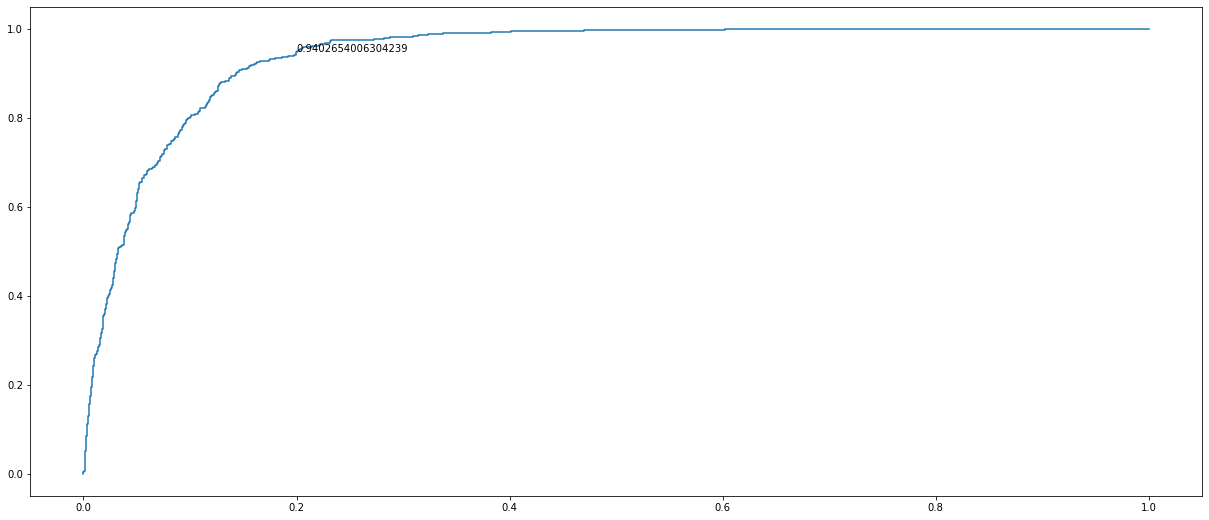

In [266]:
fig, ax = plt.subplots(figsize=(21,9))
fpr,tpr,thresold = roc_curve(y_test,y_pred)
auc = roc_auc_score(y_test,y_pred)
plt.plot(fpr,tpr)
plt.text(x=.2,y=.95,s=auc)

Some Extra Codes! Overlook and focus on work on Hand

In [267]:
#plt.figure(figsize=(15,7))
#plt.figure(clf_df, filled=True, rounded=True, class_names=["No","Yes"], feature_names = X_encoded.columns)

In [1]:
# plt.rcParams['figure.figsize']=[15,8]
# plot_confusion_matrix(clf_df,X_test,y_test,display_labels=["No","Yes"])

All Codes trying for Displaying a Decision Tree  
Trying but not having a proper Output, YET !!!!! No worries, You will get it, keep working !

In [269]:
# path = clf_df.cost_complexity_pruning_path(X_train,y_train) 
# ccp_alphas = path.ccp_alphas
# ccp_alphas = ccp_alphas[:-1]

# clf_dfs = []

# for ccp_alpha in ccp_alphas :
#     clf_df = DecisionTreeClassifier(random_state=123, ccp_alpha=ccp_alpha)
#     clf_df.fit(X_train,y_train)
#     clf_dfs.append(clf_df)

In [270]:
# train_scores = [clf_df.score(X_train, y_train) for clf_df in clf_dfs]
# test_scores = [clf_df.score(X_test, y_test) for clf_df in clf_dfs]

# fig, ax = plt.subplots()
# ax.set_xlabel("alpha")
# ax.set_xlabel("accuracy")
# ax.set_title("Accuracy vs alpha for training and testing sets")
# ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
# ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
# ax.legend()
# plt.show()

In [271]:
# #Create the Treewith ccp_alpha value as 0.001
# clf_df = DecisionTreeClassifier(random_state=123, ccp_alpha=0.001)

# scores = cross_val_score(clf_df, X_train, y_train, cv=5)
# df2 = pd.DataFrame(data={'tree':range(5),'accuracy':scores})

# df2.plot(x='tree', y='accuracy', marker='o', linestyle='--')

In [272]:
# ##Create an array to store results of each values during cross validation
# alpha_all_values=[]

# ##For each candidate value for alpha, we will run 5-fold cross validation
# ##We can then store Mean and Standard Deviation of scores(accuracy) for each call
# ## to cross_val_score in alpha_all_values
# for ccp_alpha in ccp_alphas:
#     clf_df = DecisionTreeClassifier(random_state=123, ccp_alpha=ccp_alpha)
#     scores = cross_val_score(clf_df, X_train, y_train, cv=5)
#     alpha_all_values.append([ccp_alpha, np.mean(scores), np.std(scores)])

# ##Now we can draw a graph of the means and Standard Deviation of the scores
# ## for each candidate value for alpha
# alpha_results = pd.DataFrame(alpha_all_values, columns=['alpha','mean_accuracy','std'])

# alpha_results.plot(x='alpha',y='mean_accuracy',yerr='std',marker='o',linestyle='--')

Dont forget to work on this code again!!! You are already 1-day short !!! 

# Logistic Regression (Classification) - Bank-additional-full.csv

### Program

The main code section starts from here

In [273]:
##Reading the csv file
df=pd.read_csv('bank-additional-full.csv',sep=";")
pd.options.display.max_columns=10000

In [274]:
##Printing top 10 data from the csv
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Note: We can easily verify the data given in the dataframe above

In [275]:
##Having a look at all the datatypes present in the DataFrame
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [276]:
##Checking the unique values in the Dataframe present
show_unique(df['y'])

['no' 'yes']


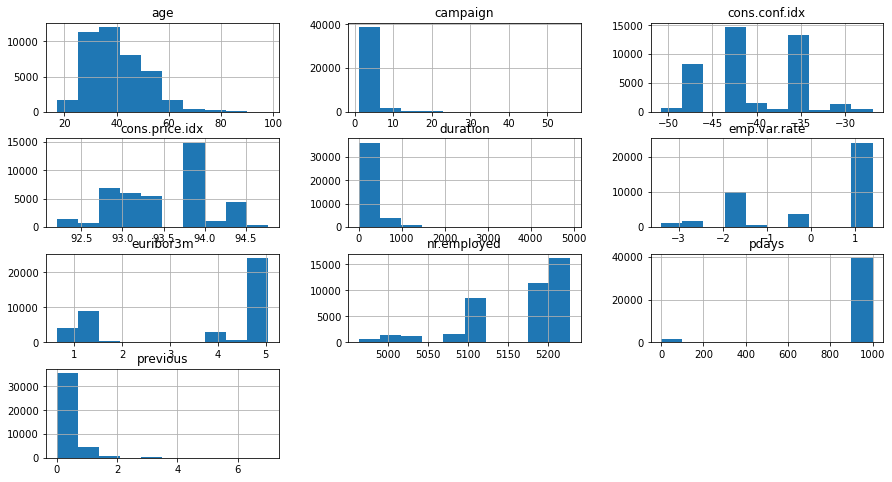

In [277]:
df.hist()
plt.show()

In [278]:
##Changing 'yes' to 1 and 'no' to 0, because target variable has to be a numerical variable
df.loc[df['y'] == 'yes', 'y'] = 1
df.loc[df['y'] == 'no', 'y'] = 0
##Cast datas of 'y' columns into int64 datatype
df['y']=df['y'].astype('int64')
##Verifying the changes
df['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [279]:
df['y'].dtypes

dtype('int64')

Separating the Independent and Target Variables into X,y, respectively

In [280]:
#Creating Target and Independent variables
X=df.drop('y', axis=1)
y=df['y']

In [281]:
df_cat = X.select_dtypes(include=['object','category'])
df_num = X.select_dtypes(exclude=['object','category'])

In [282]:
#Performing Normalisation on the data in df_num(numerical data)
df_num = pd.DataFrame(MinMaxScaler().fit_transform(df_num.values), columns=df_num.columns, index=df_num.index)


Encoding the categorical variables using n-1 Dummy Encoding

In [283]:
X_encoded=pd.get_dummies(df_cat,drop_first=True)

In [284]:
df_merged_y = pd.concat([df_num,X_encoded],axis=1)
df_merged_y = sm.add_constant(df_merged_y)

In [285]:
##Splitting the data into training and test data
X_train, X_test, y_train, y_test=train_test_split(df_merged_y,y, test_size=0.10, random_state=123)

##Create a Decision Tree and fit it into training data
#clf_df = DecisionTreeClassifier(random_state=123)
#clf_df = clf_df.fit(X_train, y_train)

In [286]:
X_train, y_train, X_test, y_test

(       const       age  duration  campaign  pdays  previous  emp.var.rate  \
 27567    1.0  0.444444  0.144571  0.018182    1.0  0.000000      0.687500   
 17288    1.0  0.308642  0.025620  0.036364    1.0  0.000000      1.000000   
 36426    1.0  0.370370  0.044937  0.000000    1.0  0.000000      0.104167   
 4230     1.0  0.432099  0.028467  0.000000    1.0  0.000000      0.937500   
 29659    1.0  0.432099  0.019317  0.018182    1.0  0.000000      0.333333   
 ...      ...       ...       ...       ...    ...       ...           ...   
 7763     1.0  0.111111  0.014640  0.036364    1.0  0.000000      1.000000   
 15377    1.0  0.320988  0.045954  0.000000    1.0  0.000000      1.000000   
 17730    1.0  0.456790  0.044327  0.000000    1.0  0.000000      1.000000   
 28030    1.0  0.271605  0.121594  0.018182    1.0  0.285714      0.333333   
 15725    1.0  0.234568  0.173648  0.000000    1.0  0.000000      1.000000   
 
        cons.price.idx  cons.conf.idx  euribor3m  nr.employed 

In [287]:
X_train

,const,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
27567,1.0,0.444444,0.144571,0.018182,1.0,0.000000,0.687500,0.389322,0.368201,0.767853,0.877883,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
17288,1.0,0.308642,0.025620,0.036364,1.0,0.000000,1.000000,0.669135,0.338912,0.981183,1.000000,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
36426,1.0,0.370370,0.044937,0.000000,1.0,0.000000,0.104167,0.296960,0.418410,0.142371,0.425709,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
4230,1.0,0.432099,0.028467,0.000000,1.0,0.000000,0.937500,0.698753,0.602510,0.957153,0.859735,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0
29659,1.0,0.432099,0.019317,0.018182,1.0,0.000000,0.333333,0.340608,0.154812,0.174790,0.512287,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7763,1.0,0.111111,0.014640,0.036364,1.0,0.000000,1.000000,0.882307,0.376569,0.959193,1.000000,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
15377,1.0,0.320988,0.045954,0.000000,1.0,0.000000,1.000000,0.669135,0.338912,0.980050,1.000000,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
17730,1.0,0.456790,0.044327,0.000000,1.0,0.000000,1.000000,0.669135,0.338912,0.980957,1.000000,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
28030,1.0,0.271605,0.121594,0.018182,1.0,0.285714,0.333333,0.340608,0.154812,0.192473,0.512287,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [288]:
y_train

27567    0
17288    0
36426    0
4230     0
29659    0
        ..
7763     0
15377    0
17730    0
28030    0
15725    1
Name: y, Length: 37069, dtype: int64

In [289]:
model = sm.Logit(y_train,X_train).fit()

         Current function value: 0.208488
         Iterations: 35


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


In [290]:
model.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:1354: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                37069
Model:                          Logit   Df Residuals:                    37016
Method:                           MLE   Df Model:                           52
Date:                Sun, 21 Feb 2021   Pseudo R-squ.:                  0.4092
Time:                        22:28:20   Log-Likelihood:                -7728.4
converged:                      False   LL-Null:                       -13082.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -2.9844      0.558     -5.350      0.000      -4.078      -1.891
age                               0.0397      0.189      0.210      0.833      -0.330       0.410
duration                         22.8313      0.341     66.979      0.000      22.163      23.499
campaign                         -2.1529      0.638     -3.375      0.001      -3.403      -0.903
pdays                            -0.9125      0.220     -4.147      0.000      -1.344      -0.481
previous                         -0.3705      0.427     -0.868      0.385      -1.207       0.466
emp.var.rate                     -8.7887      0.848    -10.365      0.000     -10.451      -7.127
cons.price.idx                    6.0216      0.911      6.611      0.000       4.236       7.807
cons.conf.idx                     0.5587      0.197      2.842      0.004       0.173       0.944
euribor3m                         1.2512      0.624      2.006      0.045       0.028       2.474
nr.employed                       1.9362      0.985      1.966      0.049       0.006       3.866
job_blue-collar                  -0.2809      0.082     -3.410      0.001      -0.442      -0.119
job_entrepreneur                 -0.1874      0.131     -1.426      0.154      -0.445       0.070
job_housemaid                    -0.0506      0.157     -0.323      0.747      -0.358       0.257
job_management                   -0.0843      0.090     -0.932      0.351      -0.261       0.093
job_retired                       0.2754      0.106      2.607      0.009       0.068       0.482
job_self-employed                -0.1351      0.122     -1.109      0.268      -0.374       0.104
job_services                     -0.1602      0.085     -1.890      0.059      -0.326       0.006
job_student                       0.2171      0.111      1.951      0.051      -0.001       0.435
job_technician                    0.0017      0.074      0.023      0.982      -0.143       0.147
job_unemployed                    0.0017      0.134      0.013      0.990      -0.261       0.264
job_unknown                      -0.0215      0.245     -0.088      0.930      -0.501       0.458
marital_married                   0.0228      0.073      0.313      0.754      -0.120       0.166
marital_single                    0.1094      0.073      1.499      0.134      -0.034       0.253
marital_unknown                   0.0869      0.418      0.208      0.835      -0.732       0.906
education_basic.6y                0.2339      0.127      1.840      0.066      -0.015       0.483
education_basic.9y                0.0252      0.108      0.234      0.815      -0.187       0.237
education_high.school             0.0648      0.097      0.666      0.505      -0.126       0.255
education_illiterate              1.2037      0.778      1.547      0.122      -0.321       2.729
education_professional.course     0.1478      0.107      1.381      0.167      -0.062       0.358
educati

In [291]:
train_predict = model.predict(X_train)
test_predict=y_pred = model.predict(X_test)

In [292]:
train_predict = [0 if x <.5 else 1 for x in train_predict]
test_predict = [0 if x <.5 else 1 for x in test_predict]

In [293]:
cm1 = confusion_matrix(train_predict,y_train)
print(cm1.ravel())

[31989  2412   888  1780]


In [294]:
cm2 = confusion_matrix(test_predict,y_test)
print(cm2.ravel())

[3581  266   90  182]


In [295]:
new_df=pd.DataFrame(data = cm1, columns= ['Predicted : 0','Predicted : 1'], index =['Actual : 0','Actual : 1'] )

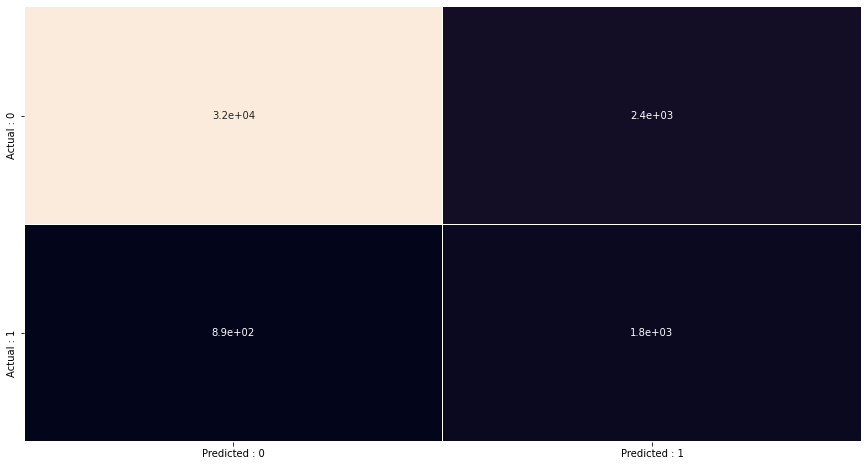

In [296]:
sns.heatmap(new_df,annot= True,linewidths =0.1,cbar=False)

In [297]:
TN,FP,FN,TP= cm1.ravel()

In [298]:
sensitivity = TP / (TP+FN)
print(sensitivity)

0.6671664167916042


In [299]:
specificity = TN /(TN + FP)
print(specificity)

0.9298857591349089


In [300]:
precision = TP / (TP+FP)
print(precision)

0.42461832061068705


In [301]:
F1_score = (2 * precision * sensitivity)/(precision+sensitivity)
print(F1_score)

0.5189504373177842


In [302]:
train_classification=classification_report(train_predict,y_train)


In [303]:
print(train_classification)

              precision    recall  f1-score   support

           0       0.97      0.93      0.95     34401
           1       0.42      0.67      0.52      2668

    accuracy                           0.91     37069
   macro avg       0.70      0.80      0.73     37069
weighted avg       0.93      0.91      0.92     37069



In [304]:
test_classification=classification_report(test_predict,y_test)

In [305]:
print(test_classification)

              precision    recall  f1-score   support

           0       0.98      0.93      0.95      3847
           1       0.41      0.67      0.51       272

    accuracy                           0.91      4119
   macro avg       0.69      0.80      0.73      4119
weighted avg       0.94      0.91      0.92      4119



Text(0.2, 0.95, '0.9402654006304239')

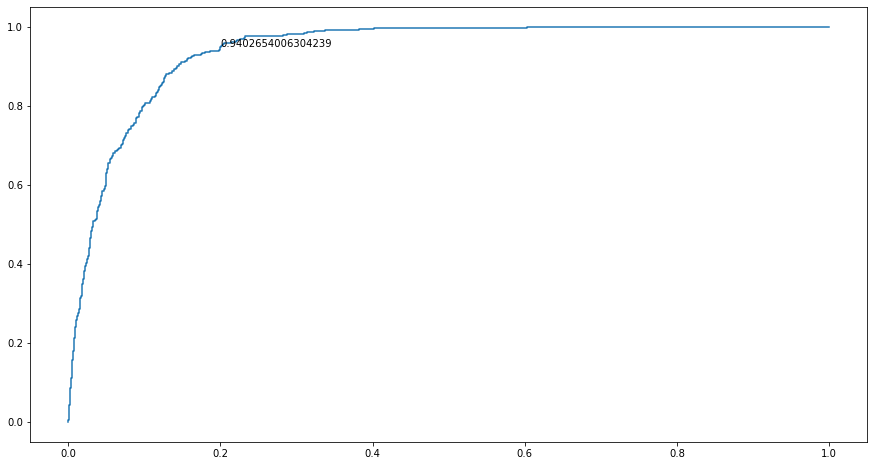

In [306]:
fpr,tpr,thresold = roc_curve(y_test,y_pred)
auc = roc_auc_score(y_test,y_pred)
plt.plot(fpr,tpr)
plt.text(x=.2,y=.95,s=auc)

# Some Other Methods to be implemented tomorrow :
- SMOTE to create some more rows having less values
- Try removing 'Unknown' with MV and then removing those MV which are effecting the Dataset
- Try removing variables having High-correlation to ease the prediction
- Try altering variables